### Naive Bayes Classifier - [ Yashwanth Y S - 1RV17VS194]

#### Steps: [ Tennis.csv is the dataset, where it describes the weather conditions and whether a match possible with that conditions]

1. Load the dataset
2. use one hot encoding to encode the X features [outlook, temp, humidity, wind, play]
3. Split the dataset as train and test test
4. Use sk-learn package to build the gaussian naive bayes model
5. Test the model

In [46]:
#libraries required

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
#load the data set
data = pd.read_csv("tennis.csv")
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


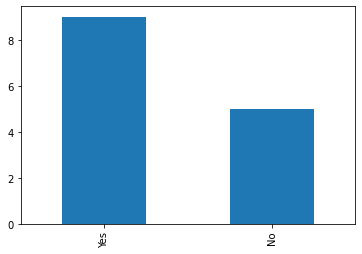

In [32]:
data['play'].value_counts(sort=True).plot.bar()

### Selecting the features and split the dataset

In [48]:
#one hot encoding for easy training
X = pd.get_dummies(data[['outlook', 'temp', 'humidity', 'wind']])
y = pd.DataFrame(data['play'])

In [40]:
#70% train data and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
8,0,0,1,1,0,0,0,1,0,1
2,1,0,0,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
13,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,0,1
10,0,0,1,0,0,1,0,1,1,0
3,0,1,0,0,0,1,1,0,0,1
6,1,0,0,1,0,0,0,1,1,0


In [42]:
model = GaussianNB()

model.fit(X_train, y_train)

predicted= model.predict([[0,1,0,0,0,1,0,1,0,0]])
print(predicted)

['Yes']


In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.8